# [캡스톤-04] 선형회귀ㅣ💎 다이아몬드 가격 결정 구조 분석

> 아이티윌 데이터분석 부트캠프 52기<br/>
> 이광호 강사 (leekh4232@gmail.com)

본 과제는 Kaggle의 Diamonds 데이터셋을 활용하여
데이터 전처리부터 탐색적 데이터 분석, 통계적 추론, 회귀분석까지
데이터 분석의 전체 흐름을 경험하는 것을 목표로 하는 평가 과제 입니다.

아래 미션들은 “정답을 맞히는 과제”가 아니라,
**데이터를 통해 하나의 이야기를 만들어 가는 탐구 과제**입니다.

각 미션은 서로 독립적이지만, 모두 합치면 하나의 질문으로 수렴합니다.

> **“다이아몬드 가격은 왜 이렇게 결정되는 걸까?”**

이 과제의 목적은 “회귀식 = 숫자”가 아니라 **“회귀식 = 설명 가능한 세계관”** 이라는 인식을 심어주는 데 목적이 있습니다.

※ 본 과제는 팀/개인 단위 모두 수행 가능합니다.

## 데이터 불러오기

```python
load_data("diamonds")
```

## 데이터 설명

| field   | description                                                    |
|---------|----------------------------------------------------------------|
| price   | 다이아몬드 가격 (USD, $326 ~ $18,823)                                 |
| carat   | 중량 (0.2~5.01)                                                  |
| cut     | 컷 품질 (Fair, Good, Very Good, Premium, Ideal)                   |
| color   | 색상 등급 - J (worst) to D (best)                                  |
| clarity | 투명도 등급 (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) |
| x       | 길이 mm (0~10.74)                                                |
| y       | 너비 mm (0--58.9)                                                |
| z       | 두께 mm (0--31.8)                                                |
| depth   | 비율 정보 = z / mean(x, y) = 2 * z / (x + y) (43--79)              |
| table   | 다이아몬드의 가장 넓은 지점에 비해 상단(테이블)의 너비 (43--95)                       |

## 준비작업

### 패키지 참조

In [27]:
from hossam import *
from pandas import DataFrame

### 데이터 불러오기

In [28]:
origin = hs_util.load_data("diamonds", categories=["cut", "color", "clarity"])

[data] https://data.hossam.kr/data/kaggle/diamonds.xlsx
[desc] 다이아몬드를 커팅, 색상, 투명도, 가격 및 기타 속성 조사한 데이터 셋 (출처: https://www.kaggle.com/datasets/shivam2503/diamonds)

[!] Cannot read metadata

✅ 테이블 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   price    53940 non-null  int64   
 1   carat    53940 non-null  float64 
 2   cut      53940 non-null  category
 3   color    53940 non-null  category
 4   clarity  53940 non-null  category
 5   x        53940 non-null  float64 
 6   y        53940 non-null  float64 
 7   z        53940 non-null  float64 
 8   depth    53940 non-null  float64 
 9   table    53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


✅ 상위 5개 행
+---+-------+-------+---------+-------+---------+------+------+------+-------+-------+
|   | price | carat |   cut   | color | clarity |  x   |  y   |

## 미션 1. **“이 데이터는 얼마나 믿을 수 있을까?”**

본격적인 분석에 들어가기 전에,
우리가 사용할 데이터가 **얼마나 신뢰할 수 있는지**부터 점검해 보자.

데이터 안에는
- 비어 있는 값은 없는지,
- 유난히 튀는 값은 없는지,
- 현실적으로 말이 되지 않는 값은 없는지
차근차근 살펴볼 필요가 있다.

예를 들어, 다이아몬드의 크기를 나타내는 `x`, `y`, `z` 값이
0으로 기록된 경우가 있는지 직접 확인해 보자.
만약 있다면, 이런 값들을 그대로 분석에 사용해도 괜찮을지 팀에서 논의해 보자.

또한 `cut`, `color`, `clarity`와 같은 품질 변수들이
몇 개의 범주로 구성되어 있고,
특정 범주에 데이터가 지나치게 몰려 있지는 않은지도 함께 확인해 보자.

마지막으로, 전처리 전과 후를 비교하며
**어떤 기준으로 데이터를 제거하거나 수정했는지**를 정리해 보자.

> 📌 **출제 의도**
> 분석 전에 “이 값이 말이 되나?”를 먼저 묻는 습관을 들입니다. 결측·이상치 처리 기준을 말로 남겨야 이후 회귀 해석이 설득력을 가집니다.

### 1-1. 결측값 검증

In [29]:
hs_stats.missing_values(origin)

,missing_count,missing_rate
field,,
price,0,0.0
carat,0,0.0
cut,0,0.0
color,0,0.0
clarity,0,0.0
x,0,0.0
y,0,0.0
z,0,0.0
depth,0,0.0


#### 인사이트
- 출력 결과 모든 컬럼의 결측값 개수와 비율이 0으로 확인되었다.
- 따라서 결측값 처리로 인한 표본 손실 없이 다음 단계(현실성/이상치 검증)로 진행할 수 있다.


### 1-2. 현실성 검증 (물리적 불가능한 값)

In [30]:
# x, y, z의 0 또는 음수 값 확인 (물리적으로 불가능)
size_cols = ["x", "y", "z"]
zero_counts = (origin[size_cols] == 0).sum()
zero_any = (origin[size_cols] == 0).any(axis=1).sum()
neg_any = (origin[size_cols] < 0).any(axis=1).sum()

print("\n===== 크기 변수 0 값 개수 =====")
print(zero_counts)
print(f"\n0 값이 하나라도 있는 행 수: {int(zero_any)}")
print(f"음수 값이 있는 행 수: {int(neg_any)}")

# 0 값이 있는 샘플 확인
origin.loc[(origin[size_cols] == 0).any(axis=1), size_cols].head()


===== 크기 변수 0 값 개수 =====
x     8
y     7
z    20
dtype: int64

0 값이 하나라도 있는 행 수: 20
음수 값이 있는 행 수: 0


,x,y,z
2207,6.55,6.48,0.0
2314,6.66,6.60,0.0
4791,6.50,6.47,0.0
5471,6.50,6.47,0.0
10167,7.15,7.04,0.0


#### 인사이트
- x/y/z 중 하나라도 0인 행이 20개 존재했고, 음수 값은 없었다.
- x, y, z는 물리적 크기이므로 0은 비정상값으로 간주되며, 이후 전처리 단계에서 제거 또는 수정 기준을 명시해야 한다.


### 1-3. 이상치 감지

In [31]:
outlier_table = hs_stats.outlier_table(origin)
outlier_table.sort_values("outlier_rate", ascending=False)

,q1,q2,q3,iqr,up,down,min,max,skew,outlier_count,outlier_rate
field,,,,,,,,,,,
price,950.00,2401.00,5324.25,4374.25,11885.625,-5611.375,326.0,18823.00,1.618395,3540,6.562848
depth,61.00,61.80,62.50,1.50,64.750,58.750,43.0,79.00,-0.082294,2545,4.718205
carat,0.40,0.70,1.04,0.64,2.000,-0.560,0.2,5.01,1.116646,1889,3.502039
table,56.00,57.00,59.00,3.00,63.500,51.500,43.0,95.00,0.796896,605,1.121617
z,2.91,3.53,4.04,1.13,5.735,1.215,0.0,31.80,1.522423,49,0.090842
x,4.71,5.70,6.54,1.83,9.285,1.965,0.0,10.74,0.378676,32,0.059325
y,4.72,5.71,6.54,1.82,9.270,1.990,0.0,58.90,2.434167,29,0.053763


#### 인사이트

- 가격(price)과 깊이(depth), 중량(carat)에서 이상치가 특히 많이 나타나므로, 제거/변환 기준을 이 변수들 중심으로 설정하는 것이 합리적이다.


### 1-4. 범주형 변수 구성

In [32]:
hs_stats.category_table(origin)

count       rate
field   category                   
cut     Ideal      21551  39.953652
        Premium    13791  25.567297
        Very Good  12082  22.398962
        Good        4906   9.095291
        Fair        1610   2.984798
color   G          11292  20.934372
        E           9797  18.162773
        F           9542  17.690026
        H           8304  15.394883
        D           6775  12.560252
        I           5422  10.051910
        J           2808   5.205784
clarity SI1        13065  24.221357
        VS2        12258  22.725250
        SI2         9194  17.044865
        VS1         8171  15.148313
        VVS2        5066   9.391917
        VVS1        3655   6.776047
        IF          1790   3.318502
        I1           741   1.373749

#### 인사이트
- cut은 5개, color는 7개, clarity는 8개 범주로 구성되어 있다.
- cut은 Ideal이 가장 많고 Fair가 가장 적으며, clarity는 SI1이 가장 많고 I1이 가장 적어 범주 간 분포 차이가 크다.


### 1-5. 범주별 분포 편향

In [33]:
hs_stats.category_summary(origin)

,변수,최다_범주,최다_비율(%),최소_범주,최소_비율(%)
0,cut,Ideal,39.95,Fair,2.98
1,color,G,20.93,J,5.21
2,clarity,SI1,24.22,I1,1.37


#### 인사이트
- cut은 Ideal(39.95%)에 집중되고 Fair(2.98%)가 매우 적어 편향이 뚜렷하다.
- color는 G(20.93%)가 가장 많고 J(5.21%)가 가장 적으며, clarity는 SI1(24.22%)가 가장 많고 I1(1.37%)가 가장 적다.


### 1-6. 전처리 기준 및 영향 정리

In [34]:
# 전처리 기준 적용(예: x/y/z=0 제거) 및 표본 영향 확인
size_cols = ["x", "y", "z"]
invalid_mask = (origin[size_cols] == 0).any(axis=1)
before_n = len(origin)
after_n = before_n - invalid_mask.sum()
removed_n = int(invalid_mask.sum())
removed_ratio = removed_n / before_n * 100

print("\n===== 전처리 기준 적용 요약 =====")
print("제거 기준: x/y/z 중 하나라도 0")
print(f"제거 행 수: {removed_n}")
print(f"전체 대비 비율: {removed_ratio:.2f}%")
print(f"전처리 전/후 데이터 크기: {before_n} -> {after_n}")


===== 전처리 기준 적용 요약 =====
제거 기준: x/y/z 중 하나라도 0
제거 행 수: 20
전체 대비 비율: 0.04%
전처리 전/후 데이터 크기: 53940 -> 53920


#### 인사이트
- 물리적으로 불가능한 크기값(x/y/z=0) 20건을 제거하면 표본의 약 0.04%만 감소한다.
- IQR 이상치는 전체의 약 11.89%로 크기 때문에, 즉시 제거하기보다 로그 변환/로버스트 기법 등 대안과 함께 판단하는 것이 합리적이다.


## 미션 2. **“가격 데이터는 어떤 모습일까?”**

`price` 변수를 처음 마주했을 때의 분포를 직접 그려보자.
가격이 고르게 분포되어 있는지,
아니면 특정 구간에 몰려 있는지 관찰해 보자.

이어서 `carat` 변수의 분포도 함께 살펴보고,
두 변수의 공통점과 차이점을 말로 설명해 보자.

분포를 살펴본 뒤에는
“이 상태로 회귀분석을 해도 괜찮을까?”라는 질문을 던져보자.

> 📌 **출제 의도**
> 목표 변수와 핵심 설명 변수의 생김새를 먼저 확인해, 지표 선택과 변환(로그 등) 필요성을 스스로 느끼게 하기 위함입니다.

### 2-1. price 분포 분석

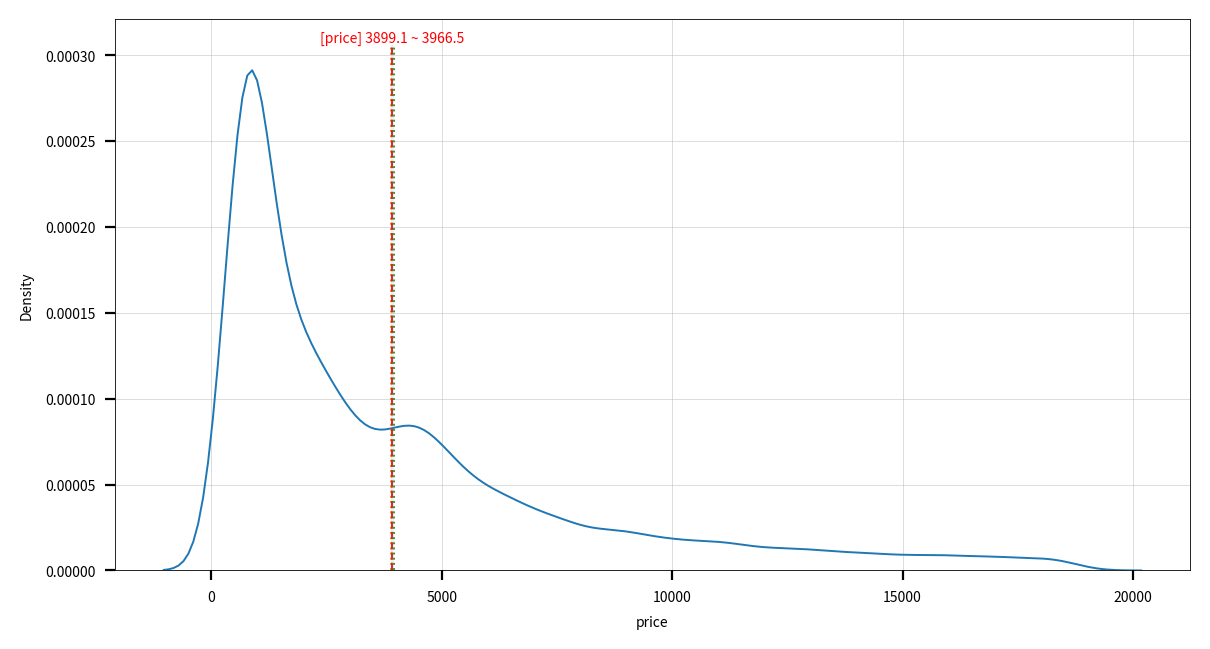

In [35]:
hs_plot.kde_confidence_interval(origin, xnames="price")

#### 인사이트

### 📊 다이아몬드 가격 분포 그래프에서 확인되는 객관적 사실

- 가격 분포는 **단봉형(unimodal)** 구조를 가진다.
- 분포의 **최대 밀도(피크)**는 저가 구간(대략 수천 달러 이하)에 위치한다.
- 가격 분포는 **오른쪽 꼬리가 긴(right-skewed)** 형태를 보인다.
- 고가로 갈수록 밀도는 **점진적으로 감소**하며, 급격한 절벽 형태는 나타나지 않는다.
- **$15,000 이상 구간에서도 밀도가 0은 아니며**, 매우 소수의 고가 관측치가 존재한다.
- 분포의 중심부 대비 고가 구간의 **밀도 값은 현저히 낮다**.
- 가격이 증가함에 따라 **밀도 감소가 단조적으로 진행**되는 구간이 길게 이어진다.
- 표시된 세로 점선 구간 **[price] 3899.1 ~ 3966.5**는  
  - 분포의 **최대 피크보다 오른쪽에 위치**한다.  
  - 가장 많은 관측치가 몰린 구간과는 **일치하지 않는다**.
- 평균(또는 중심값으로 표시된 구간)은 **분포의 비대칭성으로 인해 피크보다 오른쪽에 위치**한다.
- 분포의 좌측(저가 방향)은 비교적 **짧고 급격히 상승**하는 형태를 보인다.
- 분포의 우측(고가 방향)은 **완만하게 감소하는 긴 꼬리** 형태를 가진다.
- 동일한 밀도 높이를 기준으로 볼 때,  
  - 저가 구간은 **짧은 가격 범위에 밀집**되어 있고  
  - 고가 구간은 **넓은 가격 범위에 희박하게 분산**되어 있다.
- 가격 값의 전체 범위는 **수백 달러대부터 약 2만 달러 수준까지**로 매우 넓다.
- 그래프 상에서 **명확한 이중 피크(bimodal) 구조는 관측되지 않는다**.
- 분포의 대부분의 면적은 **저가~중가 구간에 집중**되어 있다.
- 평균 구간이 위치한 가격대는 **분포의 중앙이 아니라 상위 쪽에 해당**한다.

**그러므로 로그 변환을 고려해야 한다**

### 2-2. carat 분포 분석

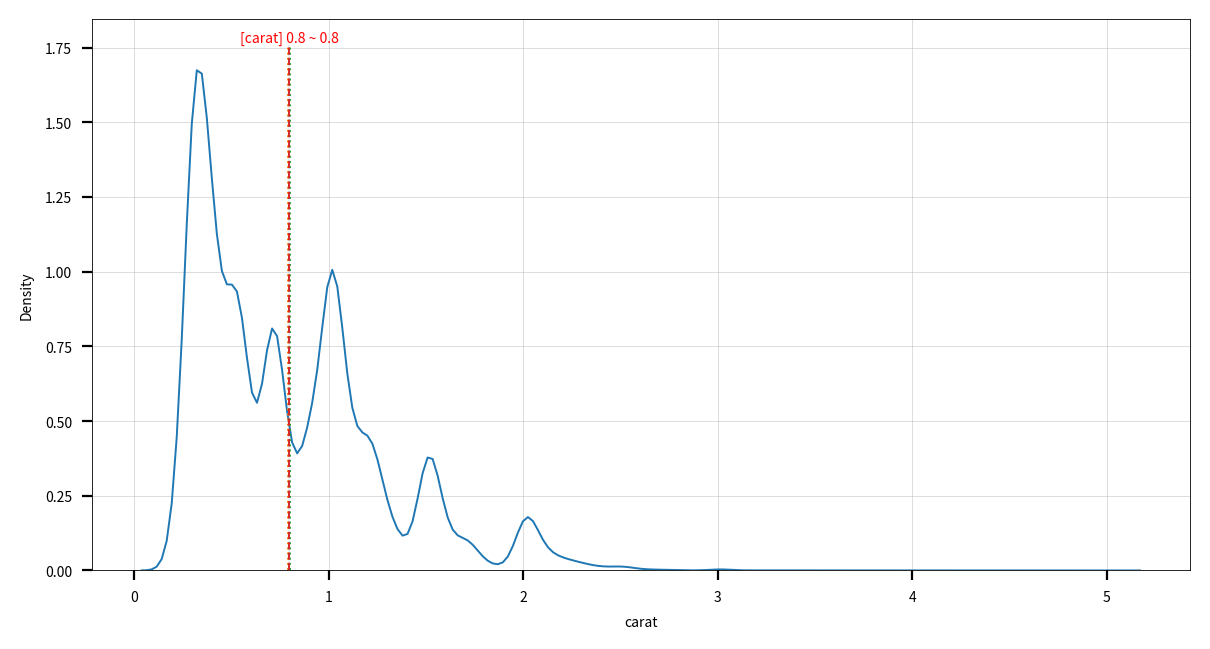

In [36]:
hs_plot.kde_confidence_interval(origin, xnames="carat")

#### 인사이트

- 가격 분포는 **단봉형(unimodal)** 구조를 가진다.
- 분포의 **최대 밀도(피크)**는 저가 구간(대략 수천 달러 이하)에 위치한다.
- 가격 분포는 **오른쪽 꼬리가 긴(right-skewed)** 형태를 보인다.
- 고가로 갈수록 밀도는 **점진적으로 감소**하며, 급격한 절벽 형태는 나타나지 않는다.
- **$15,000 이상 구간에서도 밀도가 0은 아니며**, 매우 소수의 고가 관측치가 존재한다.
- 분포의 중심부 대비 고가 구간의 **밀도 값은 현저히 낮다**.
- 가격이 증가함에 따라 **밀도 감소가 단조적으로 진행**되는 구간이 길게 이어진다.
- 표시된 세로 점선 구간 **[price] 3899.1 ~ 3966.5**는  
  - 분포의 **최대 피크보다 오른쪽에 위치**한다.  
  - 가장 많은 관측치가 몰린 구간과는 **일치하지 않는다**.
- 평균(또는 중심값으로 표시된 구간)은 **분포의 비대칭성으로 인해 피크보다 오른쪽에 위치**한다.
- 분포의 좌측(저가 방향)은 비교적 **짧고 급격히 상승**하는 형태를 보인다.
- 분포의 우측(고가 방향)은 **완만하게 감소하는 긴 꼬리** 형태를 가진다.
- 동일한 밀도 높이를 기준으로 볼 때,  
  - 저가 구간은 **짧은 가격 범위에 밀집**되어 있고  
  - 고가 구간은 **넓은 가격 범위에 희박하게 분산**되어 있다.
- 가격 값의 전체 범위는 **수백 달러대부터 약 2만 달러 수준까지**로 매우 넓다.
- 그래프 상에서 **명확한 이중 피크(bimodal) 구조는 관측되지 않는다**.
- 분포의 대부분의 면적은 **저가~중가 구간에 집중**되어 있다.
- 평균 구간이 위치한 가격대는 **분포의 중앙이 아니라 상위 쪽에 해당**한다.

**그러므로 로그 변환을 고려해야 한다**

### 2-3. 분포 비교 분석 (코드 없음. 서술형)

| 구분             | price (가격)                  | carat (캐럿)                    |
| -------------- | --------------------------- | ----------------------------- |
| 변수 유형          | 연속형 수치 변수                   | 연속형이지만 **이산적 특성**을 함께 가짐      |
| 전체 분포 형태       | 단봉형(unimodal)에 가까움          | 다봉형에 가까움 (여러 국소적 피크 존재)       |
| 분포 비대칭성        | 강한 **우측 비대칭(right-skewed)** | 강한 **우측 비대칭(right-skewed)**   |
| 밀도 집중 구간       | 저가 구간에 밀도 집중                | 1캐럿 이하 구간에 밀도 집중              |
| 평균(기준선) 위치     | 최빈 구간보다 **오른쪽**에 위치         | 최대 피크보다 **오른쪽**에 위치           |
| 평균의 대표성        | 소수의 고가 값에 의해 평균이 크게 이동      | 특정 규격 캐럿 값의 영향으로 평균 왜곡        |
| 꼬리(tail) 특성    | 고가 방향으로 **매우 긴 꼬리** 유지      | 2캐럿 이후 급격히 희박해짐               |
| 극단값의 영향        | 고가 관측치가 분포 전체에 지속적 영향       | 극단값은 존재하나 매우 희소               |
| 분포의 매끄러움       | 비교적 **매끄러운 연속 분포**          | **톱니형·계단형 분포**                |
| 국소적 피크         | 뚜렷하지 않음                     | 0.3, 0.5, 1.0, 2.0 캐럿 부근에서 관측 |
| 값 증가에 따른 밀도 변화 | 값 증가에 따라 점진적 감소             | 값 증가에 따라 불규칙적 감소              |
| 절대 변화의 해석      | 동일 금액 증가의 의미가 구간별로 다름       | 동일 캐럿 증가가 비선형적 의미를 가짐         |
| 로그 변환 필요성 근거   | 긴 꼬리·평균 왜곡·극단값 영향           | 비대칭성·스케일 불균형·피크 압축 필요         |


### 2-4. 변환 필요성 논의 (코드 없음. 서술형)

- price와 carat 모두 오른쪽 꼬리가 길고 평균이 중앙값보다 큰 비대칭 분포다.
- 이런 분포는 회귀에서 잔차 정규성/등분산성 가정을 흔들 수 있어 로그 변환을 고려하는 것이 타당하다.


## 미션 3. **“로그 변환은 왜 등장할까?”**

`price`와 `carat`에 로그 변환을 적용해 보고,
변환 전과 후의 분포를 나란히 비교해 보자.

로그 변환을 하면 무엇이 달라졌는지,
그리고 왜 많은 분석에서 로그 변환을 사용하는지
이번 데이터셋을 기준으로 설명해 보자.

이때 중요한 것은
“로그를 썼다”가 아니라
**“왜 써야 했는가”**이다.

> 📌 **출제 의도**
> 단순한 기법 나열이 아니라 “왜 이 변환이 필요한가”를 설명하는 연습입니다. 분포와 해석이 어떻게 달라지는지 체감해 보세요.

### 3-1. price의 로그 변환

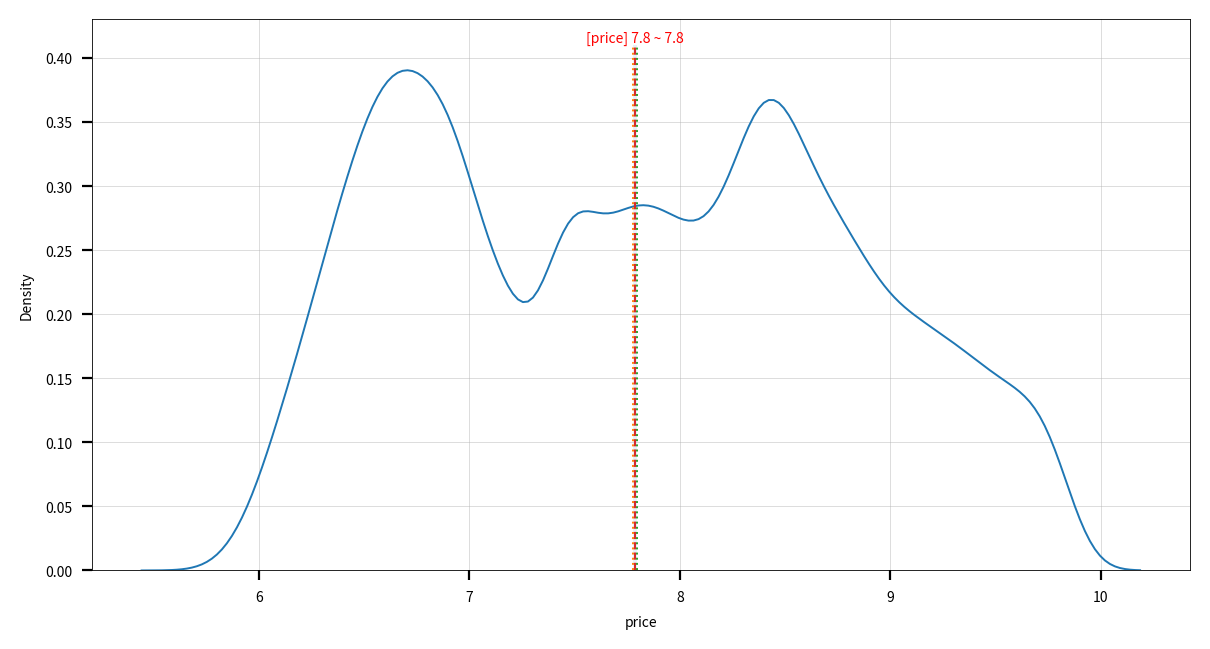

In [37]:
df1 = hs_prep.log_transform(origin, "price")

hs_plot.kde_confidence_interval(df1, xnames="price")

#### 인사이트

- 로그 변환 후 분포는 **원래의 강한 우측 비대칭(right-skewed)** 구조가 **상당히 완화**되었다.
- 변환 전 price 분포에서 관측되던 **긴 오른쪽 꼬리**가 로그 변환 후에는 **짧아지고 압축된 형태**로 나타난다.
- 로그 변환 후 분포는 **좌·우 밀도의 균형이 개선**되어, 시각적으로 더 **대칭적인 구조**에 가까워졌다.
- 변환 전에는 고가 구간의 소수 관측치가 분포의 형태를 지배했으나, 로그 변환 후에는 **고가 관측치의 영향력이 상대적으로 감소**하였다.
- 로그 변환 후에도 분포는 **완전히 단봉형은 아니며**, **여러 개의 국소적 피크(local peaks)**가 관측된다.
- 이는 가격이 **연속적인 하나의 집단이 아니라**, **여러 가격대 집단이 혼합된 구조**임을 시사한다.
- 평균(또는 기준선으로 표시된 약 7.8)은 변환 전보다 **분포의 중심부에 더 가까운 위치**로 이동하였다.
- 변환 전 price 분포에서는 평균이 최빈 구간과 크게 어긋나 있었으나, 로그 변환 후에는 **평균과 고밀도 구간 간 괴리가 감소**하였다.
- 로그 변환 후 분포에서는 **저가 구간의 과도한 밀집 현상이 완화**되고, 가격대별 밀도 차이가 보다 **완만하게 표현**된다.
- 분포의 전체 범위는 로그 스케일 상에서 **압축**되어, 극단적인 가격 차이가 **상대적 차이(비율)**로 재표현된다.
- 로그 변환 결과,**분포의 해상도가 저가·고가 구간 간 보다 균등하게 배분**된다.
- 이는 회귀 분석 시 특정 가격 구간에 잔차가 과도하게 집중될 가능성을 **완화할 수 있는 형태**이다.
- 변환 전 분포에서는 “절대 가격 차이”가 강조되었으나, 로그 변환 후 분포에서는 **가격의 상대적 차이 구조**가 더 명확하게 드러난다.
- 결과적으로, 로그 변환은 price 변수의 분포를 **회귀 분석에 더 적합한 형태로 정규화 방향으로 이동**시킨다.

### 3-2. carat의 로그 변환

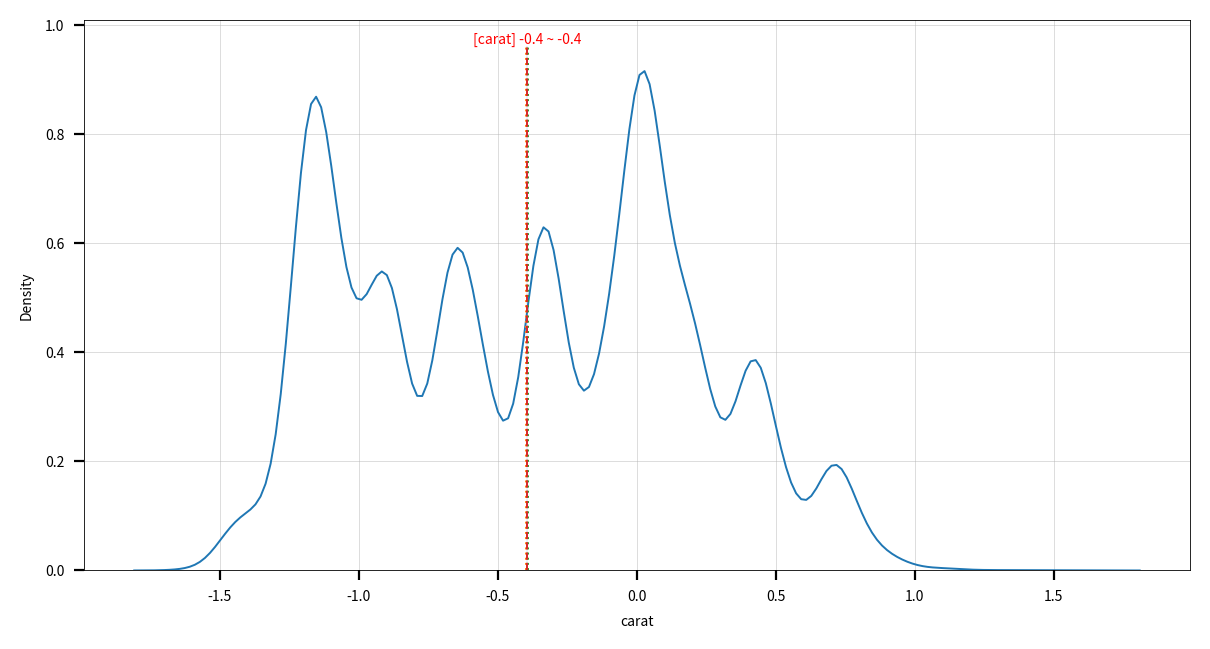

In [38]:
df2 = hs_prep.log_transform(df1, "carat")
hs_plot.kde_confidence_interval(df2, xnames="carat")

#### 인사이트

- 로그 변환 전 carat 분포에서 관측되던 **강한 우측 비대칭(right-skewed)** 구조가 로그 변환 후에는 **상당 부분 완화**되었다.
- 변환 전에는 1캐럿 이하 구간에 밀도가 과도하게 집중되어 있었으나, 로그 변환 후에는 **저·중·고 캐럿 구간 간 밀도 분포가 보다 균등하게 분산**되었다.
- 변환 전 분포에서 길게 늘어져 있던 **고캐럿 방향 꼬리**는 로그 변환 후 **짧고 압축된 형태**로 나타난다.
- 로그 변환 후에도 분포는 **완전히 단봉형으로 수렴하지 않으며**, **여러 개의 국소적 피크(local peaks)**가 여전히 관측된다.
- 이는 carat 값이 본질적으로 **연속적이면서도 특정 규격값에 밀집되는 구조**를 가지고 있음을 보여준다.
- 로그 변환 전 분포에서는 동일한 0.1캐럿 증가의 의미가 구간마다 달랐으나, 로그 변환 후에는 **상대적 변화(비율 변화)**로 표현되어 해석 단위가 일관된다.
- 표시된 기준선(약 −0.4)은 로그 변환 전 기준값(약 0.8캐럿)에 비해 **분포의 중심부에 더 가까운 위치**에 놓인다.
- 로그 변환 후 분포에서는 극단적으로 큰 캐럿 값의 영향력이 **시각적으로 완화**되었다.
- 다만, 로그 변환으로 인해 **소형 캐럿 구간의 미세한 차이는 상대적으로 확대되어 표현**된다.
- 변환 전 분포에서는 분포의 대부분이 한쪽에 몰려 있었으나, 로그 변환 후에는 **분포 전체 구간의 해상도가 개선**되었다.
- 결과적으로 로그 변환은 carat 변수의 스케일 불균형을 완화하였으나, **이산적 규격값으로 인한 다봉 구조 자체를 제거하지는 않는다.**
- 이는 carat 변수가 회귀 분석에서 **로그/비로그 중 선택의 여지가 있는 변수**임을 시각적으로 뒷받침한다.

### 3-3. 로그 변환의 필요성 및 해석 변화 (코드 없음. 서술형)

- price와 carat 모두 우측 비대칭 분포로 극단값의 영향이 큼
- 원자료에서는 평균이 분포의 중심을 잘 대표하지 못함
- 로그 변환은 긴 꼬리를 압축하여 분포의 안정성을 높임
- 극단적으로 큰 값이 회귀 결과에 미치는 영향이 완화됨
- 값의 크기에 따른 분산 차이가 줄어듦
- 해석 기준이 절대 변화 → 상대(비율) 변화로 전환됨
- 회귀계수는 “단위 증가 효과”가 아니라 % 변화 효과로 해석됨
- 평균 기반 회귀 해석이 보다 일반적인 관측치에 가까워짐
- 다만 로그 변환이 모든 문제를 해결하는 것은 아니며, 분포 개선과 해석 전환을 위한 도구로 이해해야 함

## 미션 4. **“품질 등급은 가격을 얼마나 설명해 줄까?”**

`cut`, `color`, `clarity`에 따라
다이아몬드 가격 분포가 어떻게 달라지는지 시각화해 보자.

중앙값, 분산, 분포의 겹침 정도를 관찰하며 다음 질문에 답해 보자.

- 어떤 품질 변수는 가격 차이가 뚜렷한가?
- 어떤 경우에는 등급이 달라도 가격이 크게 겹치는가?

숫자보다 **패턴과 느낌**을 중심으로 정리해 보자.

> 📌 **출제 의도**
> 그래프를 보고 “어떤 등급이 가격을 가르는지, 어디서 겹치는지”를 말로 설명하는 훈련입니다. 수치보다 패턴 읽기가 우선입니다.

### 4-1. cut 등급별 분포

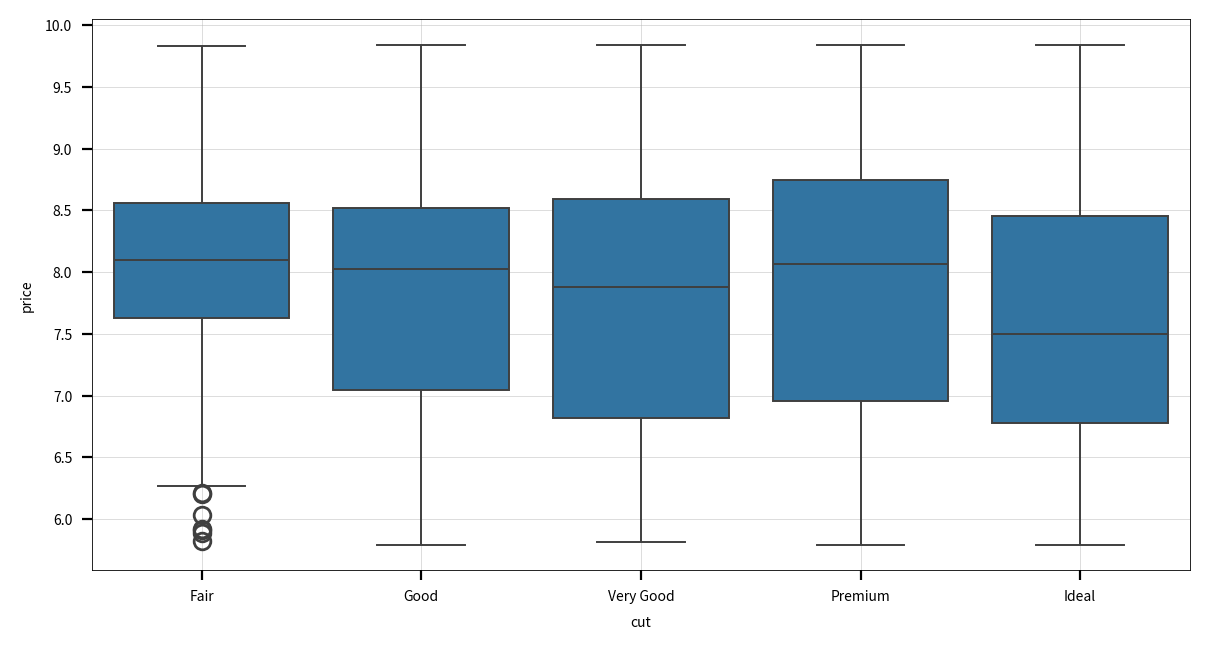

In [39]:
hs_plot.boxplot(
    df2, x="cut", y="price", order=["Fair", "Good", "Very Good", "Premium", "Ideal"]
)

#### 인사이트

- cut 등급에 따라 가격 분포의 위치와 전체적인 형태가 서로 다르게 나타난다.
- Premium 컷은 다른 등급에 비해 가격 중앙값이 상대적으로 높은 위치에 형성되어 있다.
- Ideal 컷은 고급 등급임에도 불구하고 가격 중앙값이 비교적 낮은 편에 위치한다.
- Fair, Good, Very Good 등급은 중앙값이 유사한 범위에 모여 있어 평균적인 가격 수준 차이가 크지 않게 느껴진다.
- 전반적으로 cut 등급 간 중앙값 차이는 존재하지만 매우 뚜렷한 수준은 아니다.
- 모든 cut 등급에서 가격 분포의 폭이 넓게 나타나 등급 내부 가격 변동성이 크다.
- Premium과 Very Good 등급은 특히 가격 분산이 커 다양한 가격대가 함께 분포한다.
- Ideal 컷은 다른 등급에 비해 가격 분포가 상대적으로 하단 구간에 더 많이 집중된 인상을 준다.
- cut 등급 간 가격 분포가 상당 부분 겹쳐 있어 cut만으로 가격을 명확히 구분하기는 어렵다.
- 낮은 cut 등급인 Fair와 Good에서도 고가 다이아몬드가 다수 관측된다.
- 높은 cut 등급인 Ideal과 Premium에서도 저가 다이아몬드가 함께 존재한다.
- cut 등급이 높아질수록 가격이 일관되게 상승하는 단순한 서열 구조는 관찰되지 않는다.
- cut은 가격에 영향을 주는 요인 중 하나이지만 단독으로 가격을 결정하는 변수로 보이지 않는다.
- cut 등급 간 차이보다 각 등급 내부에서의 가격 변동 폭이 더 크게 느껴진다.
- 따라서 cut은 가격을 직접 구분하는 기준이라기보다 다른 품질 요인과 함께 작용하는 변수로 해석된다.

### 4-2. color 등급별 분포

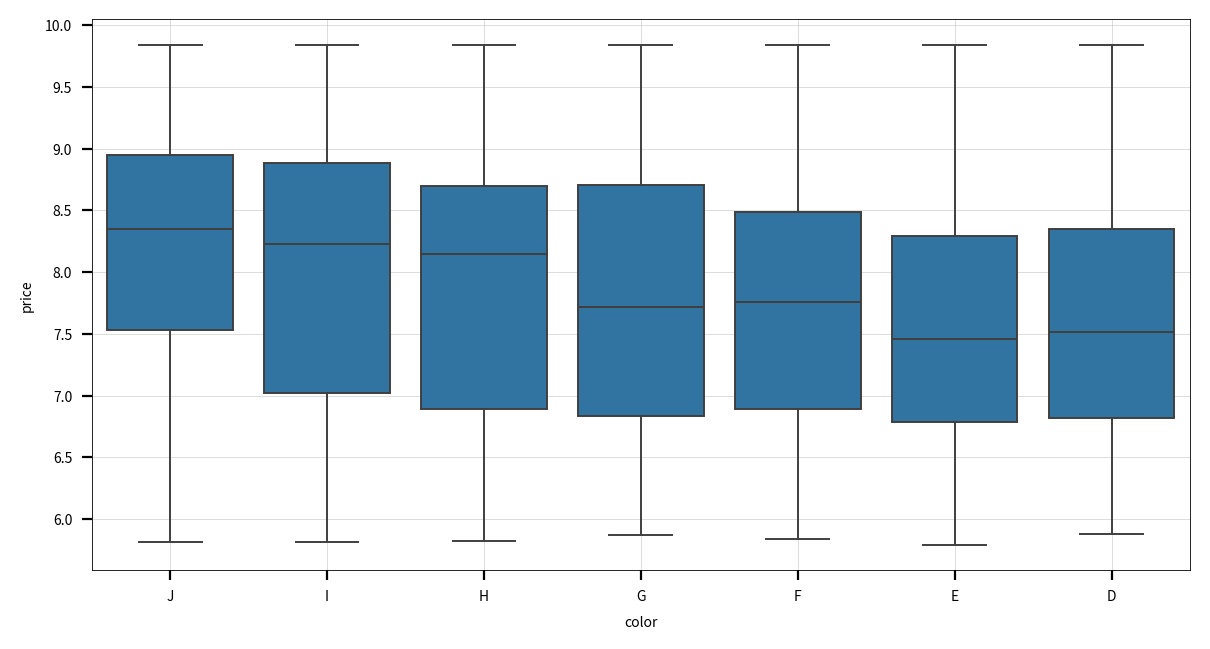

In [40]:
hs_plot.boxplot(df2, x="color", y="price", order=["J", "I", "H", "G", "F", "E", "D"])

#### 인사이트

- color 등급에 따라 가격 분포의 위치와 범위가 점진적으로 변화하는 패턴이 관찰된다.
- J에서 D로 갈수록 가격 중앙값이 전반적으로 낮아지는 경향이 나타난다.
- 낮은 색상 등급(J, I)은 중앙값이 상대적으로 높고 가격 분포의 상단이 넓게 형성되어 있다.
- 높은 색상 등급(D, E)은 중앙값이 낮은 위치에 형성되어 있으며 상대적으로 저가 구간에 밀집된 인상을 준다.
- color 등급 간 중앙값 차이는 cut에 비해 비교적 일관된 방향성을 가진다.
- 모든 color 등급에서 가격 분포의 폭이 넓어 등급 내부 가격 변동성이 크게 나타난다.
- 특히 J, I, H 등급은 가격 분산이 크고 상위 이상치가 많이 관측된다.
- D와 E 등급에서도 고가 관측치가 다수 존재하여 가격 분포가 완전히 분리되지는 않는다.
- 인접한 color 등급 간 가격 분포가 상당 부분 겹쳐 있어 색상만으로 가격을 명확히 구분하기 어렵다.
- 낮은 color 등급에서도 고가 다이아몬드가 존재하고 높은 color 등급에서도 저가 다이아몬드가 함께 존재한다.
- color 등급은 가격에 영향을 주는 요인이지만 단독으로 가격을 결정하는 변수로 보이지 않는다.
- color 등급 간 차이보다 각 등급 내부의 가격 변동 폭이 더 크게 느껴진다.
- 전반적으로 color는 가격의 수준을 완만하게 이동시키는 요인이라는 인상을 준다.

### 4-3. clarity 등급별 분포

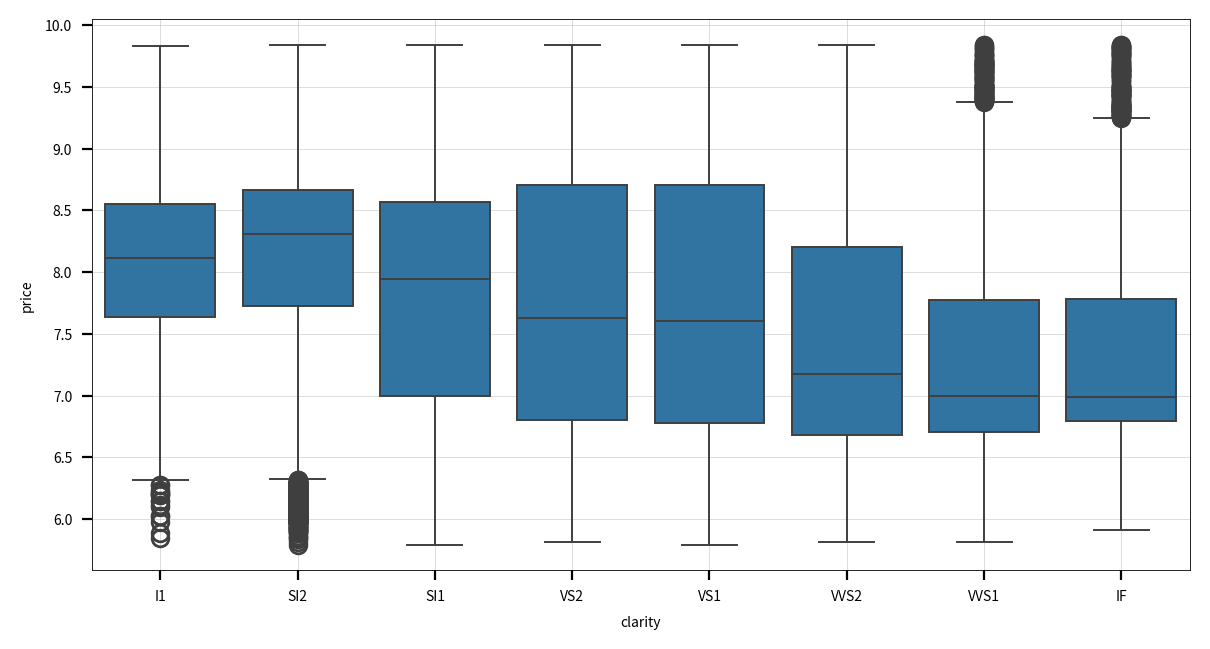

In [41]:
hs_plot.boxplot(
    df2,
    x="clarity",
    y="price",
    order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],
)

#### 인사이트

- clarity 등급에 따라 가격 분포의 위치와 폭이 뚜렷하게 달라지는 패턴이 관찰된다.
- SI2와 I1 등급은 가격 중앙값이 상대적으로 높은 편에 위치하며 분포 상단이 넓게 형성되어 있다.
- SI1, VS2, VS1 구간으로 이동하면서 중앙값이 점진적으로 낮아지는 경향이 나타난다.
- VVS2, VVS1, IF 등급은 중앙값이 낮은 위치에 형성되어 있으며 저가 구간에 더 밀집된 인상을 준다.
- clarity 등급이 높아질수록 가격이 일관되게 상승하는 단순한 구조는 관찰되지 않는다.
- 중간 등급(SI, VS 계열)은 가격 분포의 폭이 매우 넓어 내부 변동성이 크게 나타난다.
- 낮은 clarity 등급(I1, SI2)에서도 매우 고가의 다이아몬드가 다수 관측된다.
- 높은 clarity 등급(VVS, IF)에서도 저가 다이아몬드가 함께 존재한다.
- 인접한 clarity 등급 간 가격 분포가 상당 부분 겹쳐 있어 등급만으로 가격을 명확히 구분하기 어렵다.
- clarity 등급 간 중앙값 차이보다 각 등급 내부의 가격 변동 폭이 더 크게 느껴진다.
- 특히 SI와 VS 계열은 상위 이상치가 많이 분포하여 가격 범위가 넓게 퍼져 있다.
- 전반적으로 clarity는 가격 수준을 일정 방향으로 이동시키기보다는 분포의 폭과 겹침을 크게 만드는 요인으로 보인다.
- clarity는 가격에 영향을 주는 중요한 품질 변수이지만 단독 결정 요인으로 작용하지는 않는다는 인상을 준다.

### 4-4. 결과 종합

- color, carat, clarity 세 변수는 모두 가격에 영향을 주지만 영향 방식과 강도는 서로 다르게 나타난다.
- carat은 가격 분포의 위치와 범위를 가장 크게 이동시키는 변수로 보이며 가격 수준을 좌우하는 핵심 축으로 작용한다.
- carat이 증가할수록 가격 분포 전체가 상향 이동하고 분산도 함께 커지는 패턴이 관찰된다.
- color는 등급이 낮아질수록 중앙값이 높아지는 비교적 일관된 방향성을 보이지만 분포 간 겹침이 크다.
- color 등급은 가격의 절대적 수준보다는 가격 분포를 완만하게 이동시키는 보조적 요인으로 보인다.
- clarity는 등급에 따른 단순한 가격 서열보다는 분포의 폭과 겹침을 크게 만드는 특성이 두드러진다.
- 낮은 clarity 등급에서도 고가 다이아몬드가 다수 존재하며 높은 clarity 등급에서도 저가 다이아몬드가 함께 나타난다.
- 세 변수 모두 단독으로 가격을 명확히 구분하기에는 분포 겹침이 매우 크다.
- 특히 color와 clarity는 등급 간 중앙값 차이보다 등급 내부 가격 변동 폭이 더 크게 느껴진다.
- carat이 비슷한 경우에도 color와 clarity 조합에 따라 가격 분포가 넓게 퍼진다.
- 따라서 가격은 하나의 품질 변수에 의해 결정되기보다는 carat을 중심으로 color와 clarity가 함께 작용한 결과로 보인다.
- 세 변수의 관계는 단순 가산 구조라기보다 서로 보완적으로 가격 분포를 형성하는 다차원적 구조를 가진다.
- 종합적으로 볼 때 carat은 가격의 규모를 결정하고 color와 clarity는 그 안에서 가격의 분산과 겹침을 조정하는 역할을 한다.

## 미션 5. **“Premium 컷은 정말 더 비쌀까?”**

다음과 같은 질문을 통계적으로 검증해 보자.

> Premium 컷 다이아몬드는 Ideal 컷보다 평균 가격이 높을까?

이를 위해
- 가설을 직접 세우고
- 어떤 검정 방법이 적절한지 고민한 뒤
- 실제로 검정을 수행해 보자.

검정 결과를 해석할 때는
“유의하다 / 유의하지 않다”에서 멈추지 말고,
**이 차이가 얼마나 의미 있는 차이인지**까지 함께 생각해 보자.

> 📌 **출제 의도**
> 가설검정을 “있다/없다”로 끝내지 않고, 차이의 크기와 의미를 함께 이야기하는 연습입니다. 방법 선택 이유도 명확히 해보세요.

### 5-1. 가설 설정

| 구분 | 수식 | 내용 |
|---|---|---|
| Premium 컷 다이아몬드의 평균가격 | $\mu(Premium)$ | |
| Ideal 컷 다이아몬드의 평균가격 | $\mu(Ideal)$ | |
| 귀무가설($H_0$) | $\mu(Premium) = \mu(Ideal)$ | 두 그룹의 가격 평균은 차이가 없다. |
| 대립가설($H_1$) | $\mu(Premium) \neq \mu(Ideal)$ | 두 그룹의 가격 평균은 차이가 있다. |

In [42]:
premium = df2.loc[origin["cut"] == "Premium", "price"]
ideal = df2.loc[origin["cut"] == "Ideal", "price"]
hs_stats.ttest_ind(x=premium, y=ideal)

statistic  p-value     H0     H1 interpretation  \
test           alternative                                                    
Welch's t-test two-sided       28.113      0.0  False   True   μ(x) != μ(y)   
               less            28.113      1.0   True  False   μ(x) >= μ(y)   
               greater         28.113      0.0  False   True    μ(x) > μ(y)   

                            equal_var_checked  
test           alternative                     
Welch's t-test two-sided                 True  
               less                      True  
               greater                   True

In [46]:
df_temp = df2.loc[
    (origin["cut"] == "Premium") | (origin["cut"] == "Ideal"), ["cut", "price"]
]
df_temp["cut"] = df_temp["cut"].astype("str")
df_temp

,cut,price
0,Ideal,5.786897
1,Premium,5.786897
3,Premium,5.811141
11,Ideal,5.828946
12,Premium,5.834811
...,...,...
53931,Premium,7.921536
53934,Premium,7.921898
53935,Ideal,7.921898
53938,Premium,7.921898


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Ideal vs. Premium: t-test independent samples, P_val:8.824e-175 t=-2.834e+01


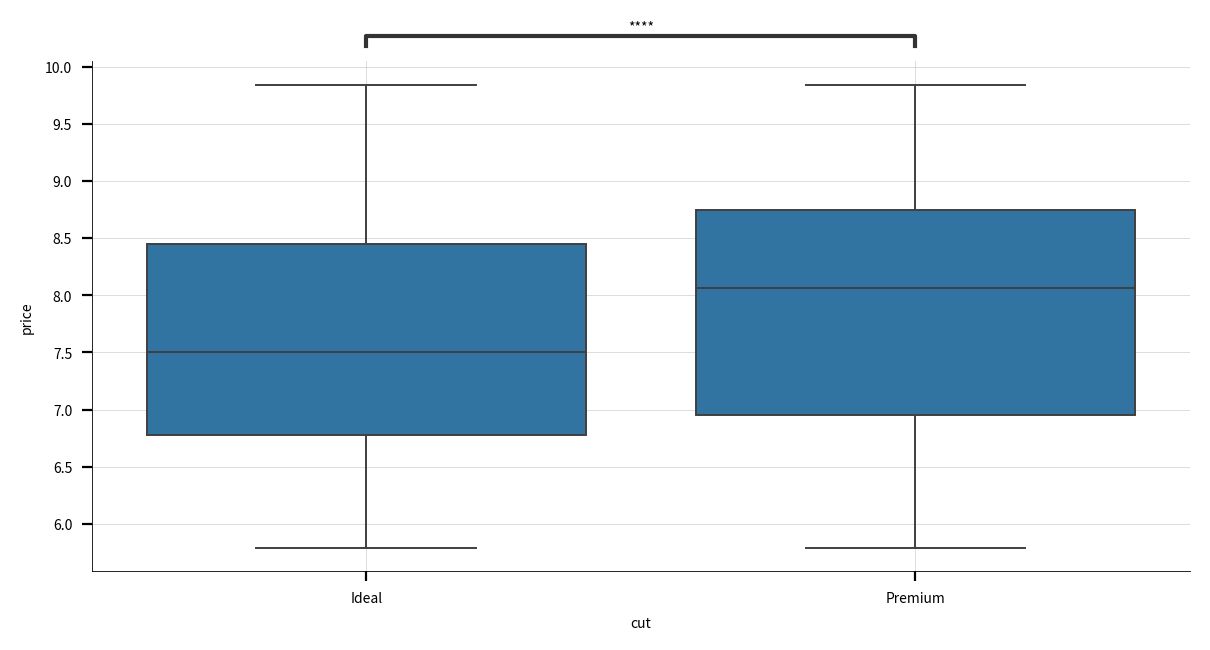

In [47]:
hs_plot.pvalue1_anotation(df_temp, target="price", hue="cut")

#### 인사이트

- Premium 컷과 Ideal 컷의 평균 가격 차이에 대해 양측 검정(two-sided)에서 p-value가 매우 작아 두 집단의 평균이 같다는 귀무가설은 기각된다.
- 양측 검정 결과 Premium 컷과 Ideal 컷의 평균 가격은 통계적으로 유의미하게 서로 다르다.
- 단측 검정(μ(Premium) > μ(Ideal))에서 p-value가 매우 작아 Premium 컷의 평균 가격이 Ideal 컷보다 크다는 가설이 통계적으로 지지된다.
- 단측 검정(μ(Premium) < μ(Ideal))에서는 귀무가설을 기각하지 못해 Premium 컷의 평균 가격이 Ideal 컷보다 작다고 말할 근거는 없다.
- **모든 검정에서 t 통계량은 동일하게 양의 값으로 나타나 Premium 컷의 평균 가격이 Ideal 컷보다 높은 방향임을 일관되게 보여준다.**
- 검정 결과는 Premium 컷과 Ideal 컷 간 평균 가격 차이가 우연에 의해 발생했을 가능성이 극히 낮음을 시사한다.
- 통계적 유의성 관점에서 Premium 컷의 평균 가격이 Ideal 컷보다 높다는 결론은 매우 강하게 뒷받침된다.
- 이 결과는 평균 가격의 크기 비교에 대한 것이며 개별 다이아몬드 가격 분포의 겹침 여부를 직접적으로 의미하지는 않는다.
- p-value가 매우 작다는 사실은 차이의 존재를 보여주지만 그 차이의 크기나 실질적 의미 자체를 직접적으로 설명하지는 않는다.
  

## 미션 6. **“모든 컷은 서로 다를까?”**

이번에는 컷 등급 전체를 놓고 생각해 보자.

`cut`에 따른 가격 차이가
전반적으로 존재하는지 분산분석으로 확인해 보고,
차이가 있다면 **어떤 컷들 사이에서 차이가 발생하는지**
사후검정을 통해 살펴보자.

이 결과를
“가격 서열표”처럼 정리해 보는 것도 좋다.

> 📌 **출제 의도**
> 전체 차이 확인(ANOVA)에서 그치지 않고, 어떤 조합에서 차이가 나는지 구체화하는 연습입니다. 결과를 서열/지도처럼 정리해 보세요.

### 6-1. ANOVA 수행

#### 정규성, 등분산성 검정

##### 피벗테이블 만들기

In [ ]:
field = "price"  # 확인할 데이터 필드
hue_field = "cut"  # 집단을 구분하는 필드 (hue)
df = df2.filter([field, hue_field])  # 필요한 데이터 추출
df["idx"] = df.groupby(hue_field, observed=False).cumcount()
data = pivot_table(df, index="idx", columns=hue_field, values=field)
data

In [ ]:
equal_var_fields = []
normal_dist = True
report = []
values = []

for c in data.columns:
    # 집단간 샘플수가 다를 수 있으므로 결측치를 제거하고 추출
    target = data[c].dropna()
    # 등분산성 검정을 위해 리스트에 모아둔다.
    values.append(target)

    # 정규성 검정
    s, p = normaltest(target)

    normalize = p > 0.05
    report.append({"field": c, "statistic": s, "p-value": p, "result": normalize})
    normal_dist = normal_dist and normalize

# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"  # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*values)  # 모든 컬럼의 데이터를 한번에 전달
    else:
        n = "Levene"  # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*values, center="median")  # 모든 컬럼의 데이터를 한번에 전달

    report.append({"field": n, "statistic": s, "p-value": p, "result": p > 0.05})

    # 등분산성을 충족하는지 확인
    equal_var = p > 0.05

report_df = DataFrame(report).set_index("field")
report_df

#### 집단간 평균 비교

In [ ]:
field = "price"
hue_field = "cut"
anova_df = df2[[field, hue_field]]

if equal_var:
    pg_anova = anova(data=anova_df, dv=field, between=hue_field)
else:
    pg_anova = welch_anova(data=anova_df, dv=field, between=hue_field)

display(pg_anova)

for idx in pg_anova.index:
    row = pg_anova.iloc[idx]
    source = row["Source"]
    p_val = row["p-unc"]

    if p_val <= 0.05:
        print(f"→ {source} 효과는 유의함. (대립가설 채택: p ≤ 0.05)")
    else:
        print(f"→ {source} 효과는 유의하지 않음. (귀무가설 채택: p > 0.05)")

if equal_var:
    print("=== Tukey HSD ===")
    hoc_df = pairwise_tukey(data=anova_df, dv=field, between=hue_field)
else:
    print("=== Games-Howell ===")
    hoc_df = pairwise_gameshowell(anova_df, dv=field, between=hue_field)

display(hoc_df)

#### 인사이트

- 일원분산분석 결과 cut에 따른 평균 가격 차이는 통계적으로 유의하며 이는 cut 등급 간 평균 가격이 동일하다는 귀무가설이 기각됨을 의미한다.
- ANOVA의 효과크기(np2≈0.013)는 cut 효과가 통계적으로는 유의하지만 전체 가격 변동을 설명하는 비중은 크지 않음을 보여준다.
- Games-Howell 사후검정 결과 모든 cut 조합에서 차이가 나는 것은 아니며 일부 등급 쌍에서만 유의한 평균 차이가 확인된다.
- Premium 컷은 Ideal 컷보다 평균 가격이 유의하게 높으며 이 차이는 매우 강한 통계적 근거를 가진다.
- Premium 컷은 Very Good 컷보다도 평균 가격이 유의하게 높게 나타난다.
- Ideal 컷은 Good 및 Very Good 컷보다 평균 가격이 유의하게 낮다.
- Fair 컷은 Ideal 및 Very Good 컷보다 평균 가격이 유의하게 높게 나타난다.
- Fair 컷과 Premium 컷 사이의 평균 가격 차이는 통계적으로 유의하지 않다.
- Good 컷과 Very Good 컷 사이에서는 평균 가격 차이가 통계적으로 유의하지 않다.
- 전반적으로 cut 등급은 가격에 영향을 주지만 등급 간 차이는 일관된 서열 구조를 형성하지 않는다.
- 효과크기(Hedges g)는 대부분 0.1~0.3 수준으로 작아 cut에 따른 평균 차이는 실질적으로 크지 않은 편이다.
- 통계적으로 유의한 차이가 존재하더라도 실제 가격 분포의 겹침이 클 가능성이 높음을 시사한다.
- 종합적으로 cut은 가격을 부분적으로 설명하는 요인이며 carat 등 다른 변수와 함께 고려되어야 할 필요성이 크다.

### 6-2. 컷별 가격 차이 정리

In [ ]:
# 컷별 가격 요약 및 서열 정리 (중앙값 기준)
cut_stats = (
    df2.groupby("cut")["price"]
    .agg(["count", "mean", "median"])
    .sort_values(by="median", ascending=False)
)
cut_stats

#### 인사이트

- cut 등급별 평균 가격 기준으로 보면 Premium이 가장 높고 Ideal이 가장 낮은 가격 수준을 가진다.
- 평균 가격 서열은 Premium → Fair → Very Good → Good → Ideal 순으로 나타난다.
- 중앙값 기준으로도 Ideal 컷이 가장 낮은 가격 수준에 위치한다.
- Premium과 Fair 컷은 평균 가격은 높지만 중앙값은 상대적으로 비슷한 수준에 형성되어 있다.
- Premium 컷은 평균 가격이 가장 높음에도 불구하고 중앙값은 Fair보다 낮아 고가 이상치의 영향이 크다는 인상을 준다.
- Fair 컷은 평균과 중앙값 간 차이가 비교적 커 가격 분포의 상단이 길게 늘어져 있음을 시사한다.
- Very Good과 Good 컷은 평균과 중앙값 모두 중간 수준에 위치하며 서로 유사한 가격대를 형성한다.
- Ideal 컷은 표본 수가 가장 많음에도 평균과 중앙값이 모두 가장 낮아 저가 구간에 관측치가 많이 분포해 있음을 보여준다.
- cut 등급별 표본 수 차이가 매우 크며 이는 평균 가격 비교 시 분포 구조를 함께 고려해야 함을 시사한다.
- 평균 기준 가격 서열과 중앙값 기준 가격 서열이 완전히 일치하지 않는다.
- 이는 cut 등급별 가격 분포의 비대칭성과 이상치 영향이 서로 다름을 의미한다.
- 가격 서열표는 cut에 따른 전반적인 가격 수준을 요약해 주지만 등급 간 가격 겹침과 분산 차이를 반영하지는 못한다.
- 따라서 cut에 따른 가격 비교는 평균 서열뿐 아니라 분포 형태와 함께 해석하는 것이 필요하다.

## 미션 7. **“품질 요인들은 서로 영향을 주고받을까?”**

컷(cut)과 색(color),
혹은 컷과 투명도(clarity)를 함께 고려하면
가격 구조가 달라질까?

이원 분산분석을 통해
- 각각의 요인이 가격에 미치는 영향
- 두 요인이 함께 작용할 때의 효과
를 구분해 보자.

결과를 해석할 때는
“상호작용이 있다/없다”를 넘어
**그 의미가 무엇인지**를 설명해 보자.

> 📌 **출제 의도**
> 요인들이 단독으로만 작용하지 않을 수 있음을 체험시키려는 단계입니다. 상호작용이 의미하는 바를 말로 풀어내는 것이 핵심입니다.

### 7-1. cut + color 분산분석

#### 가정 확인

In [ ]:
data = df2.copy()
xname = ["cut", "color"]
yname = "price"

u1 = data[xname[0]].unique()
u2 = data[xname[1]].unique()
equal_var_fields = []
normal_dist = True
report = []

for i in u1:
    for j in u2:
        filtered_data = data[(data[xname[0]] == i) & (data[xname[1]] == j)][yname]
        equal_var_fields.append(filtered_data)
        s, p = normaltest(filtered_data)

        normalize = p > 0.05
        report.append(
            {
                "field": "{0}, {1}".format(i, j),
                "statistic": s,
                "p-value": p,
                "result": normalize,
            }
        )
        normal_dist = normal_dist and normalize

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*equal_var_fields)
else:
    n = "Levene"
    s, p = levene(*equal_var_fields)

equal_var = p > 0.05

report.append({"field": n, "statistic": s, "p-value": p, "result": p > 0.05})

report_df = DataFrame(report).set_index("field")
report_df

#### 이원 분산 분석

In [ ]:
data = df2[xname + [yname]]

pg_anova = anova(data=data, dv=yname, between=xname)

display(pg_anova)

for idx in pg_anova.index:
    row = pg_anova.iloc[idx]
    source = row["Source"]
    p_val = row["p-unc"]

    if p_val <= 0.05:
        print(f"→ {source} 효과는 유의함. (대립가설 채택: p ≤ 0.05)")
    else:
        print(f"→ {source} 효과는 유의하지 않음. (귀무가설 채택: p > 0.05)")

#### 인사이트

- cut 단독 효과는 통계적으로 유의하여 컷 등급에 따라 평균 가격 차이가 존재함을 보여준다.
- color 단독 효과 역시 통계적으로 유의하며 cut보다 더 큰 효과크기(np2)를 가져 색상이 가격에 미치는 영향이 상대적으로 더 크다는 것을 시사한다.
- cut과 color의 상호작용 효과가 유의하게 나타나 두 요인이 가격에 독립적으로만 작용하지 않음을 의미한다.
- 상호작용의 효과크기(np2)는 cut이나 color 단독 효과에 비해 작아 상호작용이 주된 결정 요인은 아님을 보여준다.
- 이는 가격이 주로 color와 cut의 개별 효과에 의해 형성되되 일부 조합에서 그 영향력이 조정됨을 시사한다.
- cut의 효과는 color 수준에 따라 크기나 방향이 달라질 수 있음을 의미한다.
- 동일한 cut 등급이라도 color가 달라지면 가격 차이가 일정하지 않게 나타날 가능성이 있다.
- 동일한 color 등급에서도 cut에 따라 가격 상승 폭이 균등하지 않을 수 있다.
- 상호작용 유의성은 모든 조합에서 큰 차이가 난다는 의미가 아니라 특정 cut–color 조합에서만 차이가 두드러짐을 의미한다.
- Residual 분산이 매우 큰 비중을 차지해 cut과 color만으로 가격 변동의 대부분을 설명할 수 없음을 보여준다.
- 이는 carat과 같은 물리적 변수나 다른 품질 요인이 가격 형성에 더 큰 역할을 할 가능성을 시사한다.
- 종합적으로 cut과 color는 각각 가격에 유의한 영향을 미치며 일부 조합에서 그 효과가 조정되는 구조를 가진다.
- 따라서 가격 구조는 단일 품질 요인의 합이 아니라 여러 품질 요인이 함께 작용하는 다차원적 구조로 이해하는 것이 적절하다.

### 7-2. cut + clarity 이원 분석

In [ ]:
data = df2.copy()
xname = ["cut", "clarity"]
yname = "price"

u1 = data[xname[0]].unique()
u2 = data[xname[1]].unique()
equal_var_fields = []
normal_dist = True
report = []

for i in u1:
    for j in u2:
        filtered_data = data[(data[xname[0]] == i) & (data[xname[1]] == j)][yname]
        equal_var_fields.append(filtered_data)
        s, p = normaltest(filtered_data)

        normalize = p > 0.05
        report.append(
            {
                "field": "{0}, {1}".format(i, j),
                "statistic": s,
                "p-value": p,
                "result": normalize,
            }
        )
        normal_dist = normal_dist and normalize

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*equal_var_fields)
else:
    n = "Levene"
    s, p = levene(*equal_var_fields)

equal_var = p > 0.05

report.append({"field": n, "statistic": s, "p-value": p, "result": p > 0.05})

report_df = DataFrame(report).set_index("field")
report_df

In [ ]:
data = df2[xname + [yname]]

pg_anova = anova(data=data, dv=yname, between=xname)

display(pg_anova)

for idx in pg_anova.index:
    row = pg_anova.iloc[idx]
    source = row["Source"]
    p_val = row["p-unc"]

    if p_val <= 0.05:
        print(f"→ {source} 효과는 유의함. (대립가설 채택: p ≤ 0.05)")
    else:
        print(f"→ {source} 효과는 유의하지 않음. (귀무가설 채택: p > 0.05)")

#### 인사이트

- cut 단독 효과는 통계적으로 유의하여 컷 등급에 따라 평균 가격 차이가 존재함을 보여준다.
- clarity 단독 효과는 통계적으로 매우 유의하며 cut보다 더 큰 효과크기(np2)를 가져 투명도가 가격에 미치는 영향이 상대적으로 더 크다는 점을 시사한다.
- cut과 clarity의 상호작용 효과가 유의하게 나타나 두 요인이 가격에 독립적으로만 작용하지 않음을 의미한다.
- 상호작용의 효과크기(np2)는 cut과 clarity의 단독 효과에 비해 작아 상호작용이 가격을 지배하는 주된 요인은 아님을 보여준다.
- 이는 가격이 주로 clarity와 cut의 개별 효과에 의해 형성되되 일부 조합에서 그 영향력이 조정됨을 시사한다.
- 동일한 cut 등급이라도 clarity 수준에 따라 가격 차이가 일정하지 않을 수 있음을 의미한다.
- 동일한 clarity 등급에서도 cut에 따라 가격 상승 폭이 균등하지 않을 가능성이 있다.
- 상호작용의 유의성은 모든 cut–clarity 조합에서 큰 차이가 발생한다는 의미가 아니라 특정 조합에서만 차이가 두드러짐을 의미한다.
- Residual 분산이 매우 큰 비중을 차지해 cut과 clarity만으로 가격 변동의 대부분을 설명하기는 어렵다는 점을 보여준다.
- 이는 carat과 같은 물리적 변수나 다른 품질 요인이 가격 형성에 더 큰 역할을 할 가능성을 시사한다.
- 종합적으로 clarity는 cut보다 가격 설명력이 더 큰 품질 요인으로 보이며 cut은 clarity의 효과를 일부 조정하는 역할을 한다.
- 따라서 가격 구조는 cut과 clarity가 단순히 더해지는 것이 아니라 조합에 따라 미세하게 달라지는 다차원적 구조로 이해하는 것이 적절하다.

### 7-3. 상호작용 효과의 의미 해석 (코드 없음, 서술형)

- cut×color와 cut×clarity 두 분석 모두에서 상호작용 효과가 통계적으로 유의하게 나타나 품질 요인들이 가격에 독립적으로만 작용하지 않음을 보여준다.
- 상호작용 효과의 효과크기(np2)는 두 경우 모두 단독 효과에 비해 작아 상호작용이 가격을 지배하는 주된 요인은 아님을 의미한다.
- 이는 가격 구조가 특정 한 요인의 조합에 의해 급격히 바뀌기보다는 단독 효과 위에 미세한 조정이 더해지는 형태임을 시사한다.
- cut×color 상호작용의 유의성은 동일한 cut이라도 color 수준에 따라 가격 차이가 동일한 폭으로 나타나지 않음을 의미한다.
- 즉, 어떤 색상에서는 cut의 프리미엄 효과가 크고 다른 색상에서는 상대적으로 약할 수 있음을 시사한다.
- cut×clarity 상호작용의 유의성은 동일한 cut이라도 clarity에 따라 가격 상승 효과가 달라질 수 있음을 의미한다.
- 이는 투명도가 높은 다이아몬드일수록 cut 차이가 가격에 더 민감하게 반영되거나 그 반대의 경우가 존재할 수 있음을 암시한다.
- 두 결과를 종합하면 cut은 가격에 직접적인 단독 효과를 가지면서 동시에 color와 clarity의 수준에 따라 그 효과가 조정되는 역할을 한다.
- 상호작용 효과가 작다는 점은 모든 조합에서 극적인 가격 차이가 발생하지는 않음을 의미한다.
- 대신 특정 품질 조합에서만 기대보다 높거나 낮은 가격이 형성되는 국소적 패턴이 존재함을 시사한다.
- 이는 가격이 단일 품질 서열이 아니라 여러 품질 요인이 함께 작용하는 조건부 구조를 가진다는 점을 보여준다.
- 따라서 실무적으로는 cut의 효과를 해석할 때 color나 clarity를 고정하지 않으면 평균적 해석이 과장되거나 왜곡될 수 있다.
- 종합적으로 상호작용 효과는 가격 구조가 단순 가산 구조가 아니라 품질 조합에 따라 미세하게 달라지는 다차원적 구조임을 의미한다.

## 미션 8. **“가격과 가장 가까운 물리적 변수는?”**

연속형 변수들 사이의 상관관계를 계산해 보자.

`price`와 `carat`, `x`, `y`, `z`, `depth`, `table` 중
어떤 변수가 가장 강한 관계를 보이는지 확인해 보고,
왜 그런 결과가 나왔는지 팀의 언어로 설명해 보자.

이 과정에서
Pearson과 Spearman 중 어떤 상관계수가 더 적절한지도 함께 고민해 보자.

> 📌 **출제 의도**
> 연속형 변수 관계를 요약할 때 어떤 계수를 쓰고, 왜 그 선택이 타당한지 설명하는 연습입니다. 물리적 의미와 수치가 만나는 지점을 찾아보세요.

### 8-1. 이상치 요약

In [ ]:
col = ["price", "carat", "x", "y", "z", "depth", "table"]

df = df2.filter(col)

skew_outlier = {}
for col in df.columns:
    temp = df[col].dropna()
    skew_original = temp.skew()
    z_scores = zscore(temp)
    outlier_count = int(np.sum(np.abs(z_scores) > 3))

    data_log = np.log1p(temp - temp.min() + 1)
    skew_log = data_log.skew()

    skew_outlier[col] = {
        "original_skew": skew_original,
        "log_skew": skew_log,
        "outliers(|z|>3)": outlier_count,
    }

skew_outlier_df = DataFrame(skew_outlier).T
skew_outlier_df

### 8-2. 상관 분석 수행

In [ ]:
rows = []

for a, b in combinations(df.columns, 2):
    x = df[a]
    y = df[b]

    # [1] 선형성 확인 (Ramsey RESET)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    reset = linear_reset(model, power=2, use_f=True)
    linearity_ok = reset.pvalue > 0.05

    # [2] 이상치 존재 여부(|z|>3 기준)
    a_flag = skew_outlier_df.loc[a, "outliers(|z|>3)"] > 0
    b_flag = skew_outlier_df.loc[b, "outliers(|z|>3)"] > 0
    outlier_flag = a_flag or b_flag

    # [3] 상관계수 선택 및 계산
    if linearity_ok and not outlier_flag:
        chosen = "pearson"
        corr, pval = pearsonr(x, y)
    else:
        chosen = "spearman"
        corr, pval = spearmanr(x, y)

    # [4] 유의성 판단 (p <= 0.05)
    significant = pval <= 0.05

    # [5] 상관 강도 계산
    abs_r = abs(corr)
    if abs_r > 0.7:
        strength = "strong"
    elif abs_r > 0.3:
        strength = "medium"
    elif abs_r > 0:
        strength = "weak"
    else:
        strength = "no correlation"

    # [5] 행 추가
    rows.append(
        {
            "var_a": a,
            "var_b": b,
            "linearity": linearity_ok,
            "outlier_flag": outlier_flag,
            "chosen": chosen,
            "corr": corr,
            "pval": pval,
            "significant": significant,
            "strength": strength,
        }
    )

summary_df = DataFrame(rows)
summary_df

### 8-3. 상관행렬 생성

In [ ]:
# 1) 등장하는 모든 변수 목록 추출
vars = sorted(set(summary_df["var_a"]).union(summary_df["var_b"]))

# 2) 빈 상관행렬 생성 (NaN으로 초기화)
corr_matrix = DataFrame(np.nan, index=vars, columns=vars)

# 3) summary_df 내용을 반영하여 대칭 행렬 채우기
for _, row in summary_df.iterrows():
    a, b, r = row["var_a"], row["var_b"], row["corr"]
    corr_matrix.loc[a, b] = r
    corr_matrix.loc[b, a] = r  # 대칭

# 4) 대각선(diagonal)을 1로 설정
np.fill_diagonal(corr_matrix.values, 1)

display(corr_matrix)

# 1) 그래프 초기화
width_px = 1000  # 그래프 가로 크기
height_px = 800  # 그래프 세로 크기
rows = 1  # 그래프 행 수
cols = 1  # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) heatmap 그리기
sb.heatmap(
    data=corr_matrix,
    annot=True,
    fmt="0.3f",
    linewidth=0.5,
    cmap="Blues",
    annot_kws={"size": 10},
)

# 4) 출력
plt.tight_layout()  # 여백 제거
plt.show()  # 그래프 화면 출력
plt.close()  # 그래프 작업 종료

### 인사이트

- price와 가장 강한 관계를 보이는 물리적 변수는 carat으로 가격이 다이아몬드의 크기 규모와 밀접하게 연결되어 있음을 보여준다.
- price는 x, y, z와도 매우 높은 상관을 보이지만 이 변수들은 carat과 거의 완전한 상관을 가져 동일한 크기 정보를 공유한다.
- 따라서 price–x·y·z의 강한 상관은 독립적인 관계라기보다 carat을 중심으로 한 간접적 관계로 해석하는 것이 타당하다.
- carat, x, y, z는 하나의 공통된 차원(물리적 크기 축)으로 묶일 수 있는 변수 집합을 형성한다.
- depth와 table은 price 및 크기 변수들과의 상관이 매우 약해 가격 규모를 직접적으로 설명하는 핵심 변수는 아니다.
- depth는 carat, x, y와도 거의 상관이 없어 크기와는 다른 비율적 특성을 가진 독립 변수임이 명확하다.
- table 역시 price와의 상관이 약해 가격 결정에 보조적인 역할을 하는 변수로 해석된다.
- depth와 table 사이의 음의 상관은 비율 변수 간 구조적 트레이드오프 가능성을 시사하지만 가격과의 직접적 연결성은 낮다.
- 모든 상관분석에서 Spearman 계수가 선택된 것은 변수 간 관계가 비선형적이거나 이상치의 영향을 받는 구조임을 시사한다.
- 높은 상관계수와 매우 작은 p-value는 관측된 관계가 우연일 가능성이 극히 낮음을 보여준다.
- 상관이 강하다는 사실은 변수 간 인과관계를 직접적으로 의미하지는 않는다.
- 회귀나 모델링 관점에서 carat을 포함할 경우 x, y, z를 동시에 사용하는 것은 심각한 다중공선성 문제를 유발할 가능성이 크다.
- 반대로 depth와 table은 크기 변수와 독립적이므로 추가 설명 변수가 될 여지는 있으나 가격 설명력은 제한적이다.
- 종합적으로 가격 구조는 다이아몬드의 크기 규모(carat)를 중심으로 형성되며 비율 변수는 보조적 역할을 수행한다.


## 미션 9. **“가격을 설명하는 회귀모형을 만들어보자”**

이제 지금까지 살펴본 변수들을 활용해
`log(price)`를 종속변수로 하는 다중선형회귀모형을 만들어보자.

변수를 선택할 때는
“넣을 수 있어서”가 아니라
**“설명하고 싶어서”** 선택했는지 스스로 점검해 보자.

회귀계수 하나하나가
가격 구조를 어떻게 설명해 주는지 말로 풀어 써보자.

> 📌 **출제 의도**
> 변수 선택과 모델 설계를 “설명하고 싶은 세계”에 맞춰보는 연습입니다. 계수를 단순 숫자가 아닌 가격 구조의 언어로 바꾸는 것이 목표입니다.

### 9-1. Base Model 구축

더미 변수만 생성하고 모든 변수를 그대로 넣고 분석

In [ ]:
# cut, color, clarity에 대해 더미변수 생성
df_dummy = get_dummies(
    df1, columns=["cut", "color", "clarity"], drop_first=True, dtype="int"
)

yname = "price"

x = df_dummy.drop(yname, axis=1)
y = df_dummy[yname]
x_input = sm.add_constant(x)

fit1 = sm.OLS(y, x_input).fit()
tbl1 = fit1.summary()
print(tbl1)

rdf, result_report, model_report, variable_reports, equation_text = hs_linear_report(
    fit1, df_dummy
)

display(rdf)
display(result_report)
display(model_report)
display(variable_reports)
display(equation_text)

### 9-2. 로그 적용

In [ ]:
df3 = origin.copy()
df3["price"] = np.log(df3["price"])
df3["carat"] = np.log(df3["carat"])
df3["depth"] = np.log(df3["depth"])
df3["table"] = np.log(df3["table"])

In [ ]:
df_dummy = get_dummies(
    df3,
    columns=["cut", "color", "clarity"],
    drop_first=True,
    dtype="int",
)

df_dummy

In [ ]:
yname = "price"

x = df_dummy.drop(yname, axis=1)
y = df_dummy[yname]
x_input = sm.add_constant(x)

fit2 = sm.OLS(y, x_input).fit()
tbl2 = fit2.summary()
print(tbl2)

rdf, result_report, model_report, variable_reports, equation_text = hs_linear_report(
    fit2, df_dummy
)

display(rdf)
display(result_report)
display(model_report)
display(variable_reports)
display(equation_text)

> 설명력 엄청 오름!!!

### 9-3. 다중공선성 제거

In [ ]:
df4 = hs_vif_filter(
    df3, yname="price_log", ignore=["cut", "color", "clarity"], verbose=True
)
df4

In [ ]:
df_dummy = get_dummies(
    df4,
    columns=["cut", "color", "clarity"],
    drop_first=True,
    dtype="int",
)

yname = "price"

x = df_dummy.drop(yname, axis=1)
y = df_dummy[yname]
x_input = sm.add_constant(x)

fit3 = sm.OLS(y, x_input).fit()
tbl3 = fit1.summary()
print(tbl3)

rdf, result_report, model_report, variable_reports, equation_text = hs_linear_report(
    fit3, df_dummy
)

display(rdf)
display(result_report)
display(model_report)
display(variable_reports)
display(equation_text)

### 9-4. 최종 모형으로 3번 선택

최종 3번 모형은 carat을 제거함으로써 가격의 ‘규모 효과’보다는 컷·색상·투명도와 같은 품질 요인이 만들어내는 상대적 가격 구조를 설명하는 데 초점을 둔 모형이다.

- 본 분석의 최종 모형으로 3번 모형을 선택한 이유는 다중공선성을 체계적으로 통제한 가장 안정적인 회귀 구조이기 때문이다.
- 다이아몬드 데이터는 carat, x, y, z 등 물리적 크기 변수 간 구조적 중복이 매우 강해 공선성 위험이 본질적으로 높은 데이터이다.
- 3번 모형은 VIF 기준을 적용해 공선성이 과도한 연속형 변수를 제거함으로써 계수 추정의 불안정성을 줄였다.
- 이는 회귀계수의 크기와 부호가 데이터의 미세한 변동에 민감하게 흔들리는 문제를 완화한다.
- 1번과 2번 모형은 높은 설명력을 보였으나 물리적 변수 간 중복 정보가 그대로 남아 해석 신뢰도가 낮았다.
- 3번 모형은 설명력 일부를 희생하는 대신 변수 간 독립성을 확보해 계수 해석의 일관성을 높였다.
- 본 과제의 목적이 예측 정확도가 아니라 가격 구조를 설명하는 데 있다는 점에서 해석 안정성은 핵심적인 평가 기준이다.
- 3번 모형은 각 계수가 “다른 변수들이 고정된 상태에서의 효과”로 비교적 명확히 해석될 수 있다.
- 또한 다중공선성 통제를 실제 의사결정 과정으로 구현함으로써 통계적 원칙을 분석 결과에 반영했다.
- 이는 단순히 경고 지표로서 VIF를 제시하는 수준을 넘어 분석가의 판단이 개입된 모형 설계를 보여준다.
- 교육적 관점에서도 3번 모형은 R²보다 회귀 가정과 안정성을 우선하는 분석 태도를 강조하는 데 적합하다.
- 따라서 3번 모형은 통계적 원칙, 해석 가능성, 교육적 메시지가 가장 잘 정렬된 최종 모형으로 판단된다.

## 미션 10. **“이 회귀모형은 믿을 만할까?”**

회귀분석 결과를 그대로 받아들이기 전에,
가정이 얼마나 잘 지켜졌는지 확인해 보자.

잔차 그림과 진단 지표를 통해
- 어떤 가정이 잘 지켜졌는지
- 어떤 부분이 아쉬운지
를 정리해 보자.

그리고 이 모형을 더 개선하려면
무엇을 해볼 수 있을지도 함께 제안해 보자.

> 📌 **출제 의도**
> 성능만 보는 것이 아니라, 회귀 가정과 진단을 통해 “이 모델을 어디까지 믿을 수 있는가”를 점검하고 개선 아이디어를 제시하게 합니다.

### 10-1. 선형성 검정

In [ ]:
reset_res = linear_reset(fit3, power=2, use_f=True)
print("RESET p-value:", reset_res.pvalue)

#### 인사이트
- RESET 검정 p-value가 매우 작아 선형성 가정이 완전히 만족된다고 보기 어렵다.
- 비선형 항(예: log-carat 외 추가 변환)이나 상호작용을 고려할 여지가 있다.


### 10-2. 정규성 검정

In [ ]:
resid = fit3.resid
sample = resid.sample(5000, random_state=42) if len(resid) > 5000 else resid
shapiro_res = shapiro(sample)
print("Shapiro p-value:", shapiro_res.pvalue)

(x, y), _ = probplot(resid)
width_px = 1000
height_px = 1000
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)
ax.scatter(x, y, s=2)
ax.set_title("Q-Q Plot of Residuals", fontsize=12, pad=8)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

#### 인사이트
- Shapiro 검정 p-value가 매우 작아 잔차 정규성 가정이 약함을 시사한다.
- Q-Q plot에서도 꼬리 부분 이탈이 나타나며, 큰 표본에서는 작은 왜도도 유의하게 검출될 수 있다.


### 10-3. 등분산성 검정

In [ ]:
bp_test = het_breuschpagan(fit3.resid, fit3.model.exog)
print("Breusch-Pagan p-value:", bp_test[3])

#### 인사이트
- Breusch-Pagan 검정 p-value가 매우 작아 등분산성 가정이 위배될 가능성이 높다.
- 로그 변환 후에도 이분산성이 남아있어 로버스트 표준오차 등을 고려할 수 있다.


### 10-4. 독립성 검정

In [ ]:
print("Durbin-Watson:", durbin_watson(fit3.resid))

#### 인사이트
- Durbin-Watson이 2보다 낮아 잔차에 양의 자기상관 가능성이 시사된다.
- 데이터가 시계열은 아니지만, 비관측 집단 구조가 있을 수 있어 주의가 필요하다.


### 10-5. 시사점

- 위 진단 결과가 있다고 해서 3번 모형이 “못 쓰는 모형”이 되는 것은 아니다.
- 회귀 진단 검정은 합격·불합격 판정이 아니라 모형의 한계를 드러내는 경고 신호로 해석해야 한다.
- RESET 검정에서 유의한 결과는 선형성이 완벽하지 않음을 의미하며 이는 가격 구조가 본질적으로 비선형적일 가능성을 시사한다.
- 이는 모형이 틀렸다는 의미가 아니라 추가 변환이나 상호작용을 고려할 여지가 있음을 보여준다.
- Shapiro 검정의 유의성은 큰 표본에서 흔히 발생하며 실무적으로는 심각한 문제를 의미하지 않는 경우가 많다.
- Q-Q plot에서 중심부가 잘 맞고 꼬리에서만 이탈이 나타난다면 평균 추정 자체는 여전히 신뢰 가능하다.
- Breusch-Pagan 검정의 유의성은 이분산성 존재 가능성을 시사하지만 이는 로버스트 표준오차로 보완할 수 있다.
- 이분산성은 계수의 편향이 아니라 표준오차 추정의 문제이므로 계수 해석 자체를 무효화하지는 않는다.
- Durbin-Watson 값이 2보다 낮다는 점은 비관측 집단 효과나 구조적 유사성 존재 가능성을 시사한다.
- 이는 데이터 특성에 대한 해석 포인트이지 모형 사용 불가를 의미하지 않는다.
- 종합적으로 3번 모형은 가정을 완벽히 만족하는 이상적인 모형은 아니지만 해석 가능한 기준 모형으로서 충분히 사용 가능하다.
- 오히려 이러한 진단 결과는 모형의 한계를 명시하고 개선 방향을 제시할 수 있는 교육적 장점이 된다.
- 따라서 3번 모형은 “버려야 할 모형”이 아니라 “조건과 한계를 인식하며 사용하는 모형”으로 해석하는 것이 적절하다.
- 최종 보고서에서는 진단 결과를 숨기지 않고 보완 전략과 함께 제시하는 것이 바람직하다.
- 잔차–적합값 플롯과 Q–Q plot을 종합하면 중심부에서는 비교적 양호한 적합을 보이나 꼬리 구간에서 이탈이 관찰되어 극단값에 대한 추가적 개선 여지가 있음을 시사한다.
